In [185]:
import pandas as pd
import numpy as np

In [186]:
df_path = './data/ATO_TaxStatistics_2016-2017_Table14.xlsx'

In [187]:
df = pd.read_excel(df_path, sheet_name=2, skiprows=3)

In [188]:
df.head()

,Income Year2,Occupation - unit group1,Sex,Taxable income ranges (tax brackets),Number of individuals no.,Salary or wages no.,Salary or wages $,Total Income or Loss3 no.,Total Income or Loss3 $,Work related car expenses no.,...,Total business income3 no.,Total business income3 $,Total business expenses3 no.,Total business expenses3 $,Net income or loss from business no.,Net income or loss from business $,Taxable income or loss3 no.,Taxable income or loss3 $,Net tax no.,Net tax $
0,2010–11,0000 Occupation blank,Female,"a. $6,000 or less",1770,955,4067170,1715,7537518,175,...,75,1631032,75,4468109,85,-275448,1505,5473700,na,24374.0
1,2010–11,0000 Occupation blank,Female,"c. $6,001 to $37,000",9615,7060,130703992,9615,193915847,1350,...,315,8624906,295,6088036,355,2549458,9615,182153329,na,7454251.0
2,2010–11,0000 Occupation blank,Female,"e. $37,001 to $80,000",3950,3640,186669157,3950,215103005,930,...,90,7747604,80,5382947,90,1595710,3950,207133691,na,35975752.0
3,2010–11,0000 Occupation blank,Female,"f. $80,001 to $180,000",780,665,62536488,780,85084180,205,...,20,2041211,20,1273453,20,745858,780,81900138,na,21732178.0
4,2010–11,0000 Occupation blank,Female,"h. $180,001 or more",85,55,13285616,85,30877953,25,...,5,1136352,5,420460,5,631887,85,29624110,na,11202899.0


# Cleaning
we need to convert 'Occupation ...' into the ANZSCO codes

We also need to drop when 'Occupation ...' == Other

In [189]:
df = df[df['Occupation - unit group1']!='Other'].copy()
df['Occupation - unit group1'] = pd.to_numeric(df['Occupation - unit group1'].str[0:4])
df.rename(columns={'Occupation - unit group1': "ANZSCO", 'Income Year2': 'IncomeYear'}, inplace=True)

In [190]:
df.head()

,IncomeYear,ANZSCO,Sex,Taxable income ranges (tax brackets),Number of individuals no.,Salary or wages no.,Salary or wages $,Total Income or Loss3 no.,Total Income or Loss3 $,Work related car expenses no.,...,Total business income3 no.,Total business income3 $,Total business expenses3 no.,Total business expenses3 $,Net income or loss from business no.,Net income or loss from business $,Taxable income or loss3 no.,Taxable income or loss3 $,Net tax no.,Net tax $
0,2010–11,0,Female,"a. $6,000 or less",1770,955,4067170,1715,7537518,175,...,75,1631032,75,4468109,85,-275448,1505,5473700,na,24374.0
1,2010–11,0,Female,"c. $6,001 to $37,000",9615,7060,130703992,9615,193915847,1350,...,315,8624906,295,6088036,355,2549458,9615,182153329,na,7454251.0
2,2010–11,0,Female,"e. $37,001 to $80,000",3950,3640,186669157,3950,215103005,930,...,90,7747604,80,5382947,90,1595710,3950,207133691,na,35975752.0
3,2010–11,0,Female,"f. $80,001 to $180,000",780,665,62536488,780,85084180,205,...,20,2041211,20,1273453,20,745858,780,81900138,na,21732178.0
4,2010–11,0,Female,"h. $180,001 or more",85,55,13285616,85,30877953,25,...,5,1136352,5,420460,5,631887,85,29624110,na,11202899.0


In [191]:
# For some godforsaken reason, the hyphen in the IncomeYear columns isn't a hyphen, it's this: –
# Let's fix that
df['IncomeYear'] = df['IncomeYear'].str.replace('–','-')

# Also there are manually entered 'na's
df.replace('na', np.nan, inplace=True)

In [192]:
df['ANZSCO'].unique()

array([   0, 1100, 1111, 1112, 1113, 1210, 1211, 1212, 1213, 1214, 1311,
       1321, 1322, 1323, 1324, 1325, 1331, 1332, 1333, 1334, 1335, 1336,
       1341, 1342, 1343, 1344, 1351, 1391, 1392, 1399, 1411, 1412, 1413,
       1414, 1419, 1421, 1491, 1492, 1493, 1494, 1499, 2111, 2112, 2113,
       2114, 2120, 2121, 2122, 2123, 2124, 2211, 2212, 2220, 2221, 2222,
       2223, 2231, 2232, 2233, 2241, 2242, 2243, 2244, 2245, 2246, 2247,
       2249, 2251, 2252, 2253, 2254, 2300, 2311, 2312, 2320, 2321, 2322,
       2323, 2324, 2325, 2326, 2330, 2331, 2332, 2333, 2334, 2335, 2336,
       2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2349, 2400,
       2410, 2411, 2412, 2413, 2414, 2415, 2419, 2421, 2422, 2491, 2492,
       2493, 2511, 2512, 2513, 2514, 2515, 2519, 2521, 2522, 2523, 2524,
       2525, 2526, 2527, 2530, 2531, 2532, 2533, 2534, 2535, 2539, 2540,
       2541, 2542, 2543, 2544, 2600, 2610, 2611, 2612, 2613, 2621, 2631,
       2632, 2633, 2711, 2712, 2713, 2721, 2722, 27

In [193]:
df['IncomeYear'].unique()

array(['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
       '2016-17'], dtype=object)

In [194]:
df['Sex '].unique()

array(['Female', 'Male'], dtype=object)

It looks like `'i. all ranges'` or `'j. all ranges'` isn't populated for some of the earlier financial years. We should do that first


In [195]:
list_fy = df['IncomeYear'].unique()
list_sex = df['Sex '].unique()
list_anzsco = df['ANZSCO'].unique()
list_brackets = df['Taxable income ranges (tax brackets) '].unique()

In [196]:
count_agg = 0
count_dummy = 0

bool_sex = {}
bool_fy = {}

data_append = []

for sex in list_sex:
    bool_sex[sex] = df['Sex ']==sex
for fy in list_fy:
    bool_fy[fy] = df['IncomeYear']==fy

for fy in list_fy:
    for sex in list_sex:
        bool_tmp = bool_fy[fy] & bool_sex[sex]
        for code in list_anzsco:
            bool_code = df['ANZSCO']==code
            
            df_tmp = df[ bool_tmp &
                         bool_code
                       ].copy()
            if len(df_tmp)==0:
                # this entry is empty; we should populate it
                # this might happen if a new ocupation code appeared, or was empty, etc.
                dummy_row = [0 for col in df.columns]
                dummy_row[0:4] = [fy, code, sex, 'k. all ranges']
                data_append.append(dummy_row)
                count_dummy += 1
            else:
                # we need to check if an aggregated row already exists
                if not any( [bs in df_tmp['Taxable income ranges (tax brackets) '].unique() for bs in ['i. all ranges', 'j. all ranges'] ]):
                    # let's create an aggregated row
                    agg_row = df_tmp.sum().values
                    agg_row[0:4] = [fy, code, sex, 'k. all ranges']
                    data_append.append(agg_row)
                    count_agg += 1

In [216]:
df_tmp = df.append(pd.DataFrame(data=data_append, columns=df.columns)).copy().reset_index(drop=True)

In [220]:
df_final = df_tmp[  (df_tmp['Taxable income ranges (tax brackets) ']=='i. all ranges') |
         (df_tmp['Taxable income ranges (tax brackets) ']=='j. all ranges') |
         (df_tmp['Taxable income ranges (tax brackets) ']=='k. all ranges')].reset_index(drop=True).copy()

# Done!
Now `df_final` contains the aggregated tax statistics for each triple `(income year, anzco, sex)`

In [227]:
df_final.sample(20)

,IncomeYear,ANZSCO,Sex,Taxable income ranges (tax brackets),Number of individuals no.,Salary or wages no.,Salary or wages $,Total Income or Loss3 no.,Total Income or Loss3 $,Work related car expenses no.,...,Total business income3 no.,Total business income3 $,Total business expenses3 no.,Total business expenses3 $,Net income or loss from business no.,Net income or loss from business $,Taxable income or loss3 no.,Taxable income or loss3 $,Net tax no.,Net tax $
54,2013-14,3125,Female,i. all ranges,319,315,18175013,319,19318255,79,...,17,258825,15,128540,17,130285,319,18849771,283.0,3.895536e+06
2776,2011-12,4413,Male,k. all ranges,42030,41905,3496559809,42025,3628715523,23690,...,1190,118189919,1310,123325136,1360,-7822100,41935,3454026445,41630.0,8.248824e+08
4916,2014-15,4422,Male,k. all ranges,45045,44508,2258846408,45028,2456558927,17822,...,3017,109636235,2893,88511940,3132,18996110,45003,2329936606,38364.0,4.320185e+08
1072,2016-17,4522,Female,j. all ranges,1118,1115,30333056,1117,34581053,315,...,60,659560,53,439380,62,175182,1117,32608681,705.0,3.831898e+06
4990,2014-15,8212,Male,k. all ranges,19761,19323,1158827837,19744,1334499173,9807,...,2082,84553640,1948,51224545,2127,32968788,19742,1238265561,17472.0,2.762934e+08
4726,2014-15,1331,Male,k. all ranges,52559,50961,4838518913,52539,5535979322,22849,...,3798,315566183,3828,256098112,3990,54445276,52481,5246857130,49688.0,1.483244e+09
839,2015-16,6393,Male,i. all ranges,2870,2863,78160593,2869,89053674,271,...,115,1631780,97,821729,120,561241,2868,87147200,1741.0,1.057748e+07
2586,2011-12,2231,Male,k. all ranges,11805,11720,906438711,11805,978803800,4825,...,400,76218473,430,73342332,470,2512602,11775,936616372,11270.0,2.338298e+08
4970,2014-15,7122,Male,k. all ranges,46480,46148,5361276931,46464,5608329354,17060,...,2044,85582586,2219,106919762,2299,-28691333,46436,5428951810,45309.0,1.541300e+09
5106,2015-16,2324,Female,k. all ranges,16294,16112,760519357,16286,862916730,4189,...,4192,65303763,3899,31700544,4295,30708286,16283,835019309,14032.0,1.613376e+08


In [259]:
df_final

,IncomeYear,ANZSCO,Sex,Taxable income ranges (tax brackets),Number of individuals no.,Salary or wages no.,Salary or wages $,Total Income or Loss3 no.,Total Income or Loss3 $,Work related car expenses no.,...,Total business income3 no.,Total business income3 $,Total business expenses3 no.,Total business expenses3 $,Net income or loss from business no.,Net income or loss from business $,Taxable income or loss3 no.,Taxable income or loss3 $,Net tax no.,Net tax $
0,2013-14,1210,Female,i. all ranges,106,103,1003602,106,1145085,2,...,2,315215,1,320562,2,-5347,106,1141663,16.0,4.025200e+04
1,2013-14,1211,Male,i. all ranges,1433,1405,68541736,1433,76095927,512,...,90,2847672,87,2820969,93,-4889,1432,72424041,1197.0,1.370144e+07
2,2013-14,1341,Male,i. all ranges,398,378,23468279,398,35002889,139,...,21,4008067,21,4080949,23,-105358,398,33646259,368.0,8.987872e+06
3,2013-14,1392,Female,i. all ranges,796,792,63136409,796,64879226,547,...,9,254106,12,284941,13,-205840,796,62249277,781.0,1.390604e+07
4,2013-14,1414,Female,i. all ranges,1134,1132,64162684,1134,67271320,655,...,23,539984,26,436413,28,70271,1134,64039163,1071.0,1.211837e+07
5,2013-14,1419,Female,i. all ranges,915,893,43606154,915,50663197,417,...,23,866211,27,942929,28,-82051,914,48090272,784.0,9.303043e+06
6,2013-14,1491,Female,i. all ranges,1846,1819,81668643,1846,91188497,919,...,155,6775344,150,6140660,160,184799,1843,85967946,1562.0,1.468891e+07
7,2013-14,2111,Female,i. all ranges,5311,5077,118347010,5304,200199087,1058,...,1972,39362563,1822,22748543,2005,15352050,5289,182214178,2757.0,2.763111e+07
8,2013-14,2112,Female,i. all ranges,2046,1949,70475485,2040,98787727,639,...,968,18356351,869,9629914,970,8397536,2040,90928155,1391.0,1.634340e+07
9,2013-14,2113,Female,i. all ranges,2653,2465,67084043,2650,90712955,781,...,874,17191473,857,11134358,904,4968843,2647,85262998,1572.0,1.177562e+07


# More
Let's aggregate over sex and produce a table of timeseries for each important column, represent avg. figures

In [260]:
data = []
count_agg = 0
for fy in list_fy:
    for code in list_anzsco:
        bool_code = df_final['ANZSCO']==code
        fy_code  = df_final['IncomeYear']==fy
        df_tmp = df_final[ fy_code &
                     bool_code
                   ].copy()
        if len(df_tmp)==2:
            agg_row = df_tmp.sum().values
            agg_row[0:4] = [fy, code, 'All', 'k. all ranges']
            data.append(agg_row)
            count_agg += 1

In [261]:
df_agg = pd.DataFrame(data=data, columns=df.columns).drop(columns=['Sex ', 'Taxable income ranges (tax brackets) '])

In [263]:
df_agg_small = df_agg[['IncomeYear',
                       'ANZSCO',
                       'Number of individuals \nno.',
                       'Salary or wages \n$',
                       'Total Income or Loss3 \n$'
                      ]].copy()
df_agg_small.columns = ['IncomeYear',
                       'ANZSCO',
                        'Number of individuals',
                        'Salary (mean)',
                        'Total Income (mean)']
df_agg_small['Salary (mean)'] = df_agg_small['Salary (mean)']/df_agg_small['Number of individuals']
df_agg_small['Total Income (mean)'] = df_agg_small['Total Income (mean)']/df_agg_small['Number of individuals']

In [279]:
df_total_income_mean = df_agg_small.pivot(index='ANZSCO', columns='IncomeYear', values='Total Income (mean)').dropna().copy()
df_salary_mean = df_agg_small.pivot(index='ANZSCO', columns='IncomeYear', values='Salary (mean)').dropna().copy()

In [280]:
df_salary_mean.head()

IncomeYear,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
ANZSCO,,,,,,,
0,28420.660402,498.993542,316.569972,249.203543,201.464440,212.402464,230.504559
1100,75160.422025,77594.073271,80709.739414,73477.424936,74485.257846,72036.522170,76356.950249
1111,82649.280935,83020.347719,84800.371613,85264.376363,84589.019809,86117.499535,86141.986991
1112,86007.928872,87926.801015,90817.229303,91228.161433,91645.670589,93612.316288,93503.443116
1113,56016.454943,59059.967018,64174.656805,69851.812127,71286.557905,72715.978373,74216.896725


In [270]:
from sklearn.decomposition import PCA

In [281]:
X = df_total_income_mean.values

In [282]:
X.shape

(448, 7)

In [295]:
pca = PCA(n_components=4, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [296]:
print(pca.explained_variance_ratio_)  

[0.99150684 0.00377875 0.00263469 0.001152  ]


In [297]:
pca.components_[0]

array([0.34950049, 0.35378785, 0.36836889, 0.38489858, 0.38593509,
       0.39891226, 0.40095403])

In [298]:
import matplotlib.pyplot as plt

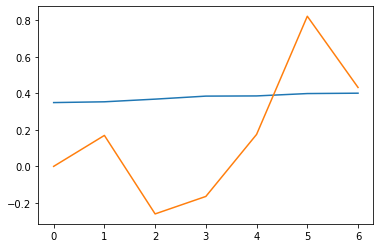

In [304]:
plt.plot(pca.components_[0])
y = df_salary_mean.iloc[5].values
y = (y-y[0])/y[0]
plt.plot(y)